<a href="https://colab.research.google.com/github/owl1753/A.I_sojon/blob/main/20210807_A_I_sojon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

import time

In [2]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_x = train_x.reshape((60000, 28, 28, 1))
test_x = test_x.reshape((10000, 28, 28, 1))

train_y = raw_train_y
test_y = raw_test_y

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
model = keras.Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [4]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
inputs = keras.Input(shape=(784,))
inputs.shape

TensorShape([None, 784])

In [7]:
inputs.dtype

tf.float32

In [8]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [9]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


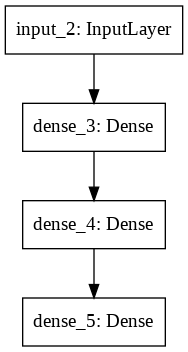

In [10]:
keras.utils.plot_model(model, "my_first_model.png")

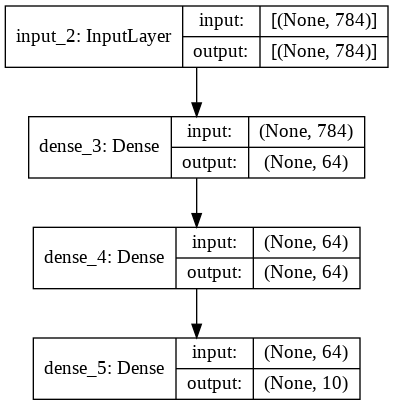

In [11]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)     # 플롯 된 그래프에 각 레이어의 입력 및 출력 모양을 표시할 수 있다

In [12]:
# 모델의 학습과 평가
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 3s 3ms/step - loss: 0.3470 - accuracy: 0.9016 - val_loss: 0.1787 - val_accuracy: 0.9481
Epoch 2/2
750/750 [==============================] - 2s 3ms/step - loss: 0.1606 - accuracy: 0.9527 - val_loss: 0.1415 - val_accuracy: 0.9590
313/313 - 0s - loss: 0.1408 - accuracy: 0.9566
Test loss: 0.14077116549015045
Test accuracy: 0.95660001039505


In [13]:
# 모델의 저장과 읽기
model.save("path_to_my_model")
del model

model = keras.models.load_model("path_to_my_model")

INFO:tensorflow:Assets written to: path_to_my_model/assets


In [14]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

In [15]:
x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                

In [16]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

In [17]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)


model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

In [18]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

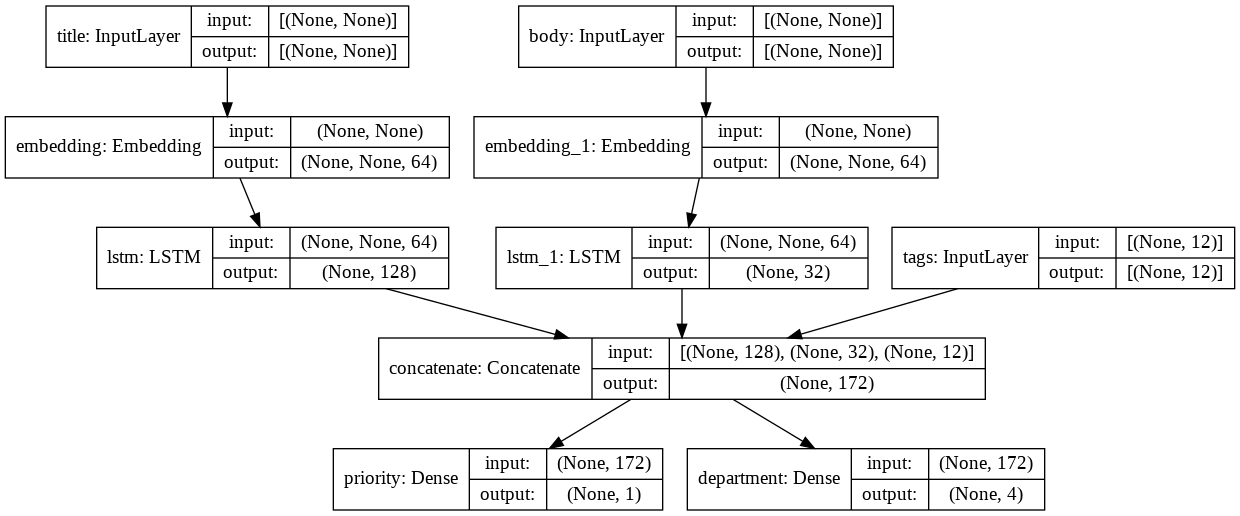

In [19]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [20]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    loss_weights=[1.0, 0.2],
)

In [21]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "priority": keras.losses.BinaryCrossentropy(from_logits=True),
        "department": keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights={"priority": 1.0, "department": 0.2},
)

In [22]:
# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

Epoch 1/2
40/40 [==============================] - 5s 18ms/step - loss: 1.2839 - priority_loss: 0.7055 - department_loss: 2.8922
Epoch 2/2
40/40 [==============================] - 1s 17ms/step - loss: 1.2861 - priority_loss: 0.7021 - department_loss: 2.9196


In [23]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 28, 28, 64)   18496       conv2d_10[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_11[0][0]                  
_________________________________________________________________________________________

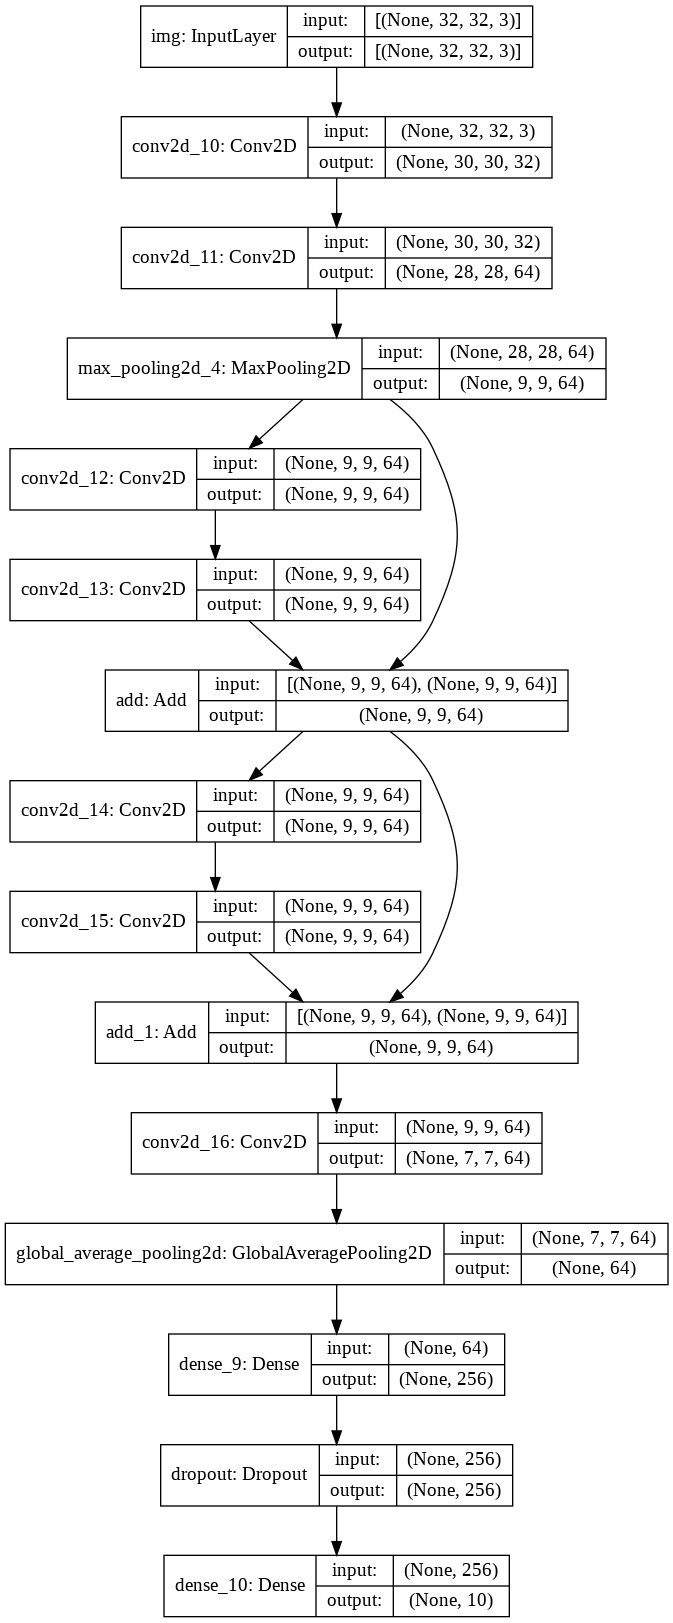

In [24]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

In [25]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, validation_split=0.2)

13/13 [==============================] - 2s 48ms/step - loss: 2.3132 - acc: 0.1275 - val_loss: 2.2800 - val_acc: 0.1300


In [26]:
# Embedding for 1000 unique words mapped to 128-dimensional vectors
shared_embedding = layers.Embedding(1000, 128)

# Variable-length sequence of integers
text_input_a = keras.Input(shape=(None,), dtype="int32")

# Variable-length sequence of integers
text_input_b = keras.Input(shape=(None,), dtype="int32")

# Reuse the same layer to encode both inputs
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

In [27]:
vgg19 = tf.keras.applications.VGG19()

574717952/574710816 [==============================] - 5s 0us/step


In [28]:
features_list = [layer.output for layer in vgg19.layers]
features_list

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_9')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv4')>,

In [29]:
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)

img = np.random.random((1, 224, 224, 3)).astype("float32")
extracted_features = feat_extraction_model(img)
extracted_features

[<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
 array([[[[0.00548879, 0.02812696, 0.602197  ],
          [0.98885036, 0.0118057 , 0.45743012],
          [0.89528555, 0.9320857 , 0.6841056 ],
          ...,
          [0.32478786, 0.55149126, 0.3507706 ],
          [0.6242873 , 0.7449624 , 0.81358445],
          [0.09246214, 0.02086911, 0.44392157]],
 
         [[0.53508896, 0.8983798 , 0.698056  ],
          [0.07808888, 0.52436775, 0.06266505],
          [0.60045046, 0.7781674 , 0.04881765],
          ...,
          [0.5722068 , 0.7756684 , 0.5135246 ],
          [0.6953756 , 0.8651297 , 0.610518  ],
          [0.4360726 , 0.6745828 , 0.6819527 ]],
 
         [[0.18053609, 0.55664015, 0.59609944],
          [0.70626926, 0.46677884, 0.96825606],
          [0.6016169 , 0.21264489, 0.23262529],
          ...,
          [0.5248286 , 0.4758765 , 0.99275225],
          [0.23117952, 0.43672612, 0.26170167],
          [0.6965759 , 0.37167647, 0.63017654]],
 
         ...,
 
       

In [30]:
# 기본 구현 형태
class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)


# 사용자 지정 계층의 직렬화 지원의 경우 레이어 인스턴스의 생성자 인수를 반환하는 메서드 정의
class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

    def get_config(self):
        return {"units": self.units}


inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)
config = model.get_config()

new_model = keras.Model.from_config(config, custom_objects={"CustomDense": CustomDense})


# (선택) 환경 정보가 담긴 딕셔너리 데이터가 주어진 레이어 인스턴스를 다시 만들 때 사용되는 클래스 메서드를 구현(기본 형태)
def from_config(cls, config):
  return cls(**config)

In [31]:
# Functional API 버전
inputs = keras.Input(shape=(32,))
x = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10)(x)
mlp = keras.Model(inputs, outputs)


# 하위 클래스링 버전
class MLP(keras.Model):

  def __init__(self, **kwargs):
    super(MLP, self).__init__(**kwargs)
    self.dense_1 = layers.Dense(64, activation='relu')
    self.dense_2 = layers.Dense(10)

  def call(self, inputs):
    x = self.dense_1(inputs)
    return self.dense_2(x)

mlp = MLP()     # Instantiate the model.

_ = mlp(tf.zeros((1, 32)))    # Necessary to create the model's state. The model doesn't have a state until it's called at least once.

In [32]:
features_list = [layer.output for layer in vgg19.layers]
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)

In [33]:
units = 32
timesteps = 10
input_dim = 5

# Define a Functional model
inputs = keras.Input((None, units))
x = layers.GlobalAveragePooling1D()(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)


class CustomRNN(layers.Layer):
    def __init__(self):
        super(CustomRNN, self).__init__()
        self.units = units
        self.projection_1 = layers.Dense(units=units, activation="tanh")
        self.projection_2 = layers.Dense(units=units, activation="tanh")
        # Our previously-defined Functional model
        self.classifier = model

    def call(self, inputs):
        outputs = []
        state = tf.zeros(shape=(inputs.shape[0], self.units))
        for t in range(inputs.shape[1]):
            x = inputs[:, t, :]
            h = self.projection_1(x)
            y = h + self.projection_2(state)
            state = y
            outputs.append(y)
        features = tf.stack(outputs, axis=1)
        print(features.shape)
        return self.classifier(features)


rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, timesteps, input_dim)))

(1, 10, 32)


In [34]:
units = 32
timesteps = 10
input_dim = 5
batch_size = 16


class CustomRNN(layers.Layer):
    def __init__(self):
        super(CustomRNN, self).__init__()
        self.units = units
        self.projection_1 = layers.Dense(units=units, activation="tanh")
        self.projection_2 = layers.Dense(units=units, activation="tanh")
        self.classifier = layers.Dense(1)

    def call(self, inputs):
        outputs = []
        state = tf.zeros(shape=(inputs.shape[0], self.units))
        for t in range(inputs.shape[1]):
            x = inputs[:, t, :]
            h = self.projection_1(x)
            y = h + self.projection_2(state)
            state = y
            outputs.append(y)
        features = tf.stack(outputs, axis=1)
        return self.classifier(features)


# Note that you specify a static batch size for the inputs with the `batch_shape`
# arg, because the inner computation of `CustomRNN` requires a static batch size
# (when you create the `state` zeros tensor).
inputs = keras.Input(batch_shape=(batch_size, timesteps, input_dim))
x = layers.Conv1D(32, 3)(inputs)
outputs = CustomRNN()(x)

model = keras.Model(inputs, outputs)

rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, 10, 5)))

In [35]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

import time

In [36]:
# model = keras.Sequential()
# model.add(Input((28,28,1)))
# model.add(Conv2D(32, (3, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(10, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(10, activation='softmax'))

from tensorflow.keras import Model

input = Input((28,28,1))
x = Conv2D(32, (3,3))(input)
x = MaxPooling2D((2,2))(x)
x = Conv2D(32, (3,3))(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(10, activation='relu')(x)
x = Dense(10, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(input, output)

In [37]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                801

In [38]:
!git clone https://github.com/emanhamed/Houses-dataset

Cloning into 'Houses-dataset'...
remote: Enumerating objects: 2166, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 2166 (delta 0), reused 0 (delta 0), pack-reused 2165
Receiving objects: 100% (2166/2166), 176.26 MiB | 35.88 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [39]:
!head 'Houses-dataset/Houses Dataset/HousesInfo.txt'

4 4 4053 85255 869500
4 3 3343 36372 865200
3 4 3923 85266 889000
5 5 4022 85262 910000
3 4 4116 85266 971226
4 5 4581 85266 1249000
3 4 2544 85262 799000
4 5 5524 85266 1698000
3 4 4229 85255 1749000
4 5 3550 85262 1500000


In [40]:
import matplotlib

from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [41]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import glob
import cv2
import os

def load_house_attributes(inputPath):

	cols = ["bedrooms", "bathrooms", "area", "zipcode", "price"]
	df = pd.read_csv(inputPath, sep=" ", header=None, names=cols)
 
	# determine (1) the unique zip codes and (2) the number of data
	# points with each zip code
	zipcodes = df["zipcode"].value_counts().keys().tolist()
	counts = df["zipcode"].value_counts().tolist()
 
	# loop over each of the unique zip codes and their corresponding
	# count
	for (zipcode, count) in zip(zipcodes, counts):
		# the zip code counts for our housing dataset is *extremely*
		# unbalanced (some only having 1 or 2 houses per zip code)
		# so let's sanitize our data by removing any houses with less
		# than 25 houses per zip code
		if count < 25:
			idxs = df[df["zipcode"] == zipcode].index
			df.drop(idxs, inplace=True)
   
	# return the data frame
	return df

def process_house_attributes(df, train, test):
	# initialize the column names of the continuous data
	continuous = ["bedrooms", "bathrooms", "area"]

	# performin min-max scaling each continuous feature column to
	# the range [0, 1]
	cs = MinMaxScaler()
	trainContinuous = cs.fit_transform(train[continuous])
	testContinuous = cs.transform(test[continuous])
 
	# one-hot encode the zip code categorical data (by definition of
	# one-hot encoding, all output features are now in the range [0, 1])
	zipBinarizer = LabelBinarizer().fit(df["zipcode"])
	trainCategorical = zipBinarizer.transform(train["zipcode"])
	testCategorical = zipBinarizer.transform(test["zipcode"])
 
	# construct our training and testing data points by concatenating
	# the categorical features with the continuous features
	trainX = np.hstack([trainCategorical, trainContinuous])
	testX = np.hstack([testCategorical, testContinuous])
 
	# return the concatenated training and testing data
	return (trainX, testX)

In [42]:
def load_house_images(df, inputPath):

	# initialize our images array (i.e., the house images themselves)
	images = []

	# loop over the indexes of the houses
	for i in df.index.values:
		# find the four images for the house and sort the file paths,
		# ensuring the four are always in the *same order*
		basePath = os.path.sep.join([inputPath, "{}_*".format(i + 1)])
		housePaths = sorted(list(glob.glob(basePath)))
  
		# initialize our list of input images along with the output image
		# after *combining* the four input images
		inputImages = []
		outputImage = np.zeros((64, 64, 3), dtype="uint8")
  
		# loop over the input house paths
		for housePath in housePaths:
			# load the input image, resize it to be 32 32, and then
			# update the list of input images
			image = cv2.imread(housePath)
			image = cv2.resize(image, (32, 32))
			inputImages.append(image)
   
		# tile the four input images in the output image such the first
		# image goes in the top-right corner, the second image in the
		# top-left corner, the third image in the bottom-right corner,
		# and the final image in the bottom-left corner
		outputImage[0:32, 0:32] = inputImages[0]
		outputImage[0:32, 32:64] = inputImages[1]
		outputImage[32:64, 32:64] = inputImages[2]
		outputImage[32:64, 0:32] = inputImages[3]

		# add the tiled image to our set of images the network will be
		# trained on
		images.append(outputImage)
  
	# return our set of images
	return np.array(images)

In [43]:
df = load_house_attributes("Houses-dataset/Houses Dataset/HousesInfo.txt")

In [44]:
df.head()

,bedrooms,bathrooms,area,zipcode,price
30,5,3.0,2520,93446,789000
32,3,2.0,1802,93446,365000
39,3,3.0,2146,93446,455000
80,4,2.5,2464,91901,599000
81,2,2.0,1845,91901,529800


In [45]:
images = load_house_images(df, "Houses-dataset/Houses Dataset/")
images = images/255.

In [46]:
print(images.shape)

(362, 64, 64, 3)


In [47]:
(trainAttrX, testAttrX, trainImagesX, testImagesX) = train_test_split(df, images, test_size=0.25, random_state=42)

maxPrice = trainAttrX["price"].max()
trainY = trainAttrX["price"] / maxPrice
testY = testAttrX["price"] / maxPrice
(trainAttrX, testAttrX) = process_house_attributes(df, trainAttrX, testAttrX)

In [49]:
print("tainAttrX.shape=", trainAttrX.shape)
print("trainImagesX.shape=", trainImagesX.shape)
print("trainY.shape=", trainY.shape)
print("testAttrX.shape=", testAttrX.shape)
print("testImageX.shape=", testImagesX.shape)
print("testY.shape=", testY.shape)

tainAttrX.shape= (271, 10)
trainImagesX.shape= (271, 64, 64, 3)
trainY.shape= (271,)
testAttrX.shape= (91, 10)
testImageX.shape= (91, 64, 64, 3)
testY.shape= (91,)


In [50]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate

In [51]:
input = Input(trainAttrX[0].shape)
x = Dense(10, activation='relu')(input)
x = Dense(10, activation='relu')(x)
output = Dense(1)(x)

attr_model = Model(input, output)

In [52]:
attr_model.compile(optimizer="adam", loss="mse")
attr_model.summary()

attr_model.fit(trainAttrX, trainY, epochs=100, verbose=0, batch_size=128)

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [53]:
preds = attr_model.predict(testAttrX)

diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)

mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print("[INFO] mean: {:.2f}%, std: {:.2f}".format(mean, std))

[INFO] mean: 46.37%, std: 61.97


In [54]:
input = Input(trainImagesX[0].shape)
x = Conv2D(32, (3,3))(input)
x = MaxPooling2D((2,2))(x)
x = Conv2D(32, (3,3))(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(10, activation='relu')(x)
x = Dense(10, activation='relu')(x)
output = Dense(1)(x)

image_model = Model(input, output)

In [55]:
image_model.compile(optimizer="adam", loss="mse")
image_model.summary()

image_model.fit(trainImagesX, trainY, epochs=100, verbose=0, batch_size=128)

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                627

In [56]:
preds = image_model.predict(testImagesX)

diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)

mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print("[INFO] mean: {:.2f}%, std: {:.2f}".format(mean, std))

[INFO] mean: 91.23%, std: 162.58


In [57]:
attr_input = Input(trainAttrX[0].shape)
x = Dense(10, activation='relu')(attr_input)
attr_out = Dense(10, activation='linear')(x)

image_input = Input(trainImagesX[0].shape)
x = Conv2D(32, (3,3))(image_input)
x = MaxPooling2D((2,2))(x)
x = Conv2D(32, (3,3))(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(10, activation='relu')(x)
image_output = Dense(10, activation='linear')(x)

combined_input = concatenate([attr_out, image_output])

x = Dense(4, activation="relu")(combined_input)
output = Dense(1)(x)


combined_model = Model([attr_input, image_input], output)

In [58]:
combined_model.compile(optimizer="adam", loss="mse")
combined_model.summary()

combined_model.fit([trainAttrX, trainImagesX], trainY, epochs=100, verbose=0, batch_size=128)

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 62, 62, 32)   896         input_19[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 31, 31, 32)   0           conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 29, 29, 32)   9248        max_pooling2d_9[0][0]            
___________________________________________________________________________________________

In [59]:
preds = combined_model.predict([testAttrX, testImagesX])

diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)

mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print("[INFO] mean: {:.2f}%, std: {:.2f}".format(mean, std))

[INFO] mean: 113.54%, std: 184.39


In [60]:
!wget https://github.com/dhrim/pis_study/raw/master/multi_label_classification/fashion_dataset.zip

--2021-08-07 10:28:08--  https://github.com/dhrim/pis_study/raw/master/multi_label_classification/fashion_dataset.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/pis_study/master/multi_label_classification/fashion_dataset.zip [following]
--2021-08-07 10:28:08--  https://raw.githubusercontent.com/dhrim/pis_study/master/multi_label_classification/fashion_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26991216 (26M) [application/zip]
Saving to: ‘fashion_dataset.zip’

fashion_dataset.zip 100%[===================>]  25.74M  --.-KB/s    in 0.1s    

2021-08-07 10:28:09 (218 MB/s

In [61]:
!ls -alh

total 26M
drwxr-xr-x 1 root root 4.0K Aug  7 10:28 .
drwxr-xr-x 1 root root 4.0K Aug  7 08:31 ..
drwxr-xr-x 4 root root 4.0K Jul 16 13:19 .config
-rw-r--r-- 1 root root  26M Aug  7 10:28 fashion_dataset.zip
drwxr-xr-x 4 root root 4.0K Aug  7 10:09 Houses-dataset
-rw-r--r-- 1 root root 141K Aug  7 09:11 mini_resnet.png
-rw-r--r-- 1 root root  50K Aug  7 08:59 multi_input_and_output_model.png
-rw-r--r-- 1 root root 7.8K Aug  7 08:44 my_first_model.png
-rw-r--r-- 1 root root  24K Aug  7 08:46 my_first_model_with_shape_info.png
drwxr-xr-x 4 root root 4.0K Aug  7 08:48 path_to_my_model
drwxr-xr-x 1 root root 4.0K Jul 16 13:20 sample_data


In [62]:
!unzip fashion_dataset.zip

Archive:  fashion_dataset.zip
   creating: fashion_dataset/
   creating: fashion_dataset/black_jeans/
  inflating: fashion_dataset/black_jeans/00000000.jpg  
   creating: __MACOSX/
   creating: __MACOSX/fashion_dataset/
   creating: __MACOSX/fashion_dataset/black_jeans/
  inflating: __MACOSX/fashion_dataset/black_jeans/._00000000.jpg  
  inflating: fashion_dataset/black_jeans/00000004.jpg  
  inflating: __MACOSX/fashion_dataset/black_jeans/._00000004.jpg  
  inflating: fashion_dataset/black_jeans/00000006.jpg  
  inflating: __MACOSX/fashion_dataset/black_jeans/._00000006.jpg  
  inflating: fashion_dataset/black_jeans/00000007.jpg  
  inflating: __MACOSX/fashion_dataset/black_jeans/._00000007.jpg  
  inflating: fashion_dataset/black_jeans/00000009.jpg  
  inflating: __MACOSX/fashion_dataset/black_jeans/._00000009.jpg  
  inflating: fashion_dataset/black_jeans/00000010.jpg  
  inflating: __MACOSX/fashion_dataset/black_jeans/._00000010.jpg  
  inflating: fashion_dataset/black_jeans/000000

In [87]:
import matplotlib

from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [65]:
IMAGE_DIMS = (96, 96, 3)

In [66]:
imagePaths = sorted(list(paths.list_images('fashion_dataset')))
random.shuffle(imagePaths)
print(len(imagePaths))
print(imagePaths[:3])

755
['fashion_dataset/blue_dress/00000115.jpg', 'fashion_dataset/blue_shirt/00000044.jpg', 'fashion_dataset/red_shirt/00000016.jpg']


In [67]:
data = []
categoryLabels = []
colorLabels = []

for imagePath in imagePaths:
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = img_to_array(image)
	data.append(image)

	(color, cat) = imagePath.split(os.path.sep)[-2].split("_")
  # imagePath = 'fashion_dataset/black_shoes/00000048.jpg'
  # color = 'black'
  # cat = 'shoes'
	categoryLabels.append(cat)
	colorLabels.append(color)

In [69]:
print(categoryLabels[:10])
print(colorLabels[:10])

['dress', 'shirt', 'shirt', 'shirt', 'dress', 'jeans', 'jeans', 'jeans', 'dress', 'shirt']
['blue', 'blue', 'red', 'red', 'blue', 'black', 'black', 'blue', 'blue', 'blue']


755 755 755
iamgePaths[0]= fashion_dataset/blue_dress/00000115.jpg


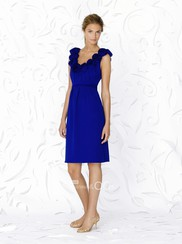

data[0]= (96, 96, 3)
categoryLabels[0]= dress
colorLabels[0]= blue


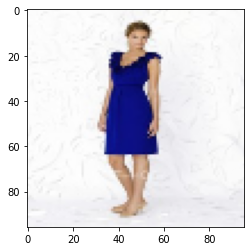

In [70]:
from IPython.display import Image, display

print(len(data), len(categoryLabels), len(colorLabels))
print("iamgePaths[0]=", imagePaths[0])
display(Image(imagePaths[0]))

print("data[0]=", data[0].shape)
plt.imshow(data[0]/255)
print("categoryLabels[0]=", categoryLabels[0])
print("colorLabels[0]=", colorLabels[0])

In [71]:
data = np.array(data, dtype="float")
print("[INFO] data matrix: {} images ({:.2f}MB)".format(len(imagePaths), data.nbytes / (1024 * 1000.0)))

# convert the label lists to NumPy arrays prior to binarization
categoryLabels = np.array(categoryLabels)
colorLabels = np.array(colorLabels)

[INFO] data matrix: 755 images (163.08MB)


In [72]:
data = data/255.

In [74]:
print(categoryLabels[:5])
categoryLB = LabelBinarizer()
categoryLabels = categoryLB.fit_transform(categoryLabels)
print(categoryLabels[:5])


print(colorLabels[:5])
colorLB = LabelBinarizer()
colorLabels = colorLB.fit_transform(colorLabels)
print(colorLabels[:5])

[[1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]]
[[1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]]
[[0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]]
[[0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]]


In [75]:
(trainX, testX, trainCategoryY, testCategoryY, trainColorY, testColorY) = train_test_split(data, categoryLabels, colorLabels, test_size=0.2, random_state=42)

print(trainX.shape)
print(trainCategoryY.shape)
print(trainColorY.shape)

print(testX.shape)
print(testCategoryY.shape)
print(testColorY.shape)

(604, 96, 96, 3)
(604, 4)
(604, 3)
(151, 96, 96, 3)
(151, 4)
(151, 3)


In [76]:
CATEGORY_COUNT = categoryLabels.shape[-1]
COLOR_COUNT = colorLabels.shape[-1]

print(CATEGORY_COUNT)
print(COLOR_COUNT)

4
3


In [77]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input


def build_category_model():

  model = keras.Sequential()
  model.add(Input(IMAGE_DIMS))
  model.add(Conv2D(32, (3, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(CATEGORY_COUNT, activation='softmax'))

  return model

def build_color_model():

  model = keras.Sequential()
  model.add(Input(IMAGE_DIMS))
  model.add(Conv2D(32, (3, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(COLOR_COUNT, activation='softmax'))

  return model

In [79]:
print(trainX.shape)
print(trainCategoryY.shape)
print(CATEGORY_COUNT)

(604, 96, 96, 3)
(604, 4)
4


In [80]:
category_model = build_category_model()

category_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
category_model.summary()


category_model.fit(trainX, trainCategoryY, epochs=5, verbose=1, batch_size=128)


loss, acc = category_model.evaluate(testX, testCategoryY)
print("loss=",loss)
print("acc=",acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                309770    
_________________________________________________________________
dense_40 (Dense)             (None, 10)               

In [81]:
print(trainX.shape)
print(trainColorY.shape)
print(COLOR_COUNT)

(604, 96, 96, 3)
(604, 3)
3


In [82]:
color_model = build_color_model()

color_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
color_model.summary()


color_model.fit(trainX, trainColorY, epochs=5, verbose=1, batch_size=128)


loss, acc = color_model.evaluate(testX, testColorY)
print("loss=",loss)
print("acc=",acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                309770    
_________________________________________________________________
dense_43 (Dense)             (None, 10)               

In [83]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input


def common_input_branch(input):

  x = Conv2D(32, (3, 3))(input)
  x = MaxPooling2D((2, 2))(x)
  x = Conv2D(64, (3, 3))(x)
  x = MaxPooling2D((2, 2))(x)
  x = Flatten()(x)

  return x


def category_branch(x):

  x = Dense(10, activation='relu')(x)
  x = Dense(10, activation='relu')(x)
  x = Dense(CATEGORY_COUNT, activation='softmax', name='category_output')(x)

  return x

def color_branch(x):

  x = Dense(10, activation='relu')(x)
  x = Dense(10, activation='relu')(x)
  x = Dense(COLOR_COUNT, activation='softmax', name='color_output')(x)

  return x

In [84]:
input = Input(IMAGE_DIMS)

common_input = common_input_branch(input)
category_output = category_branch(common_input)
color_output = color_branch(common_input)

multi_output_model = Model(input, [category_output, color_output])

multi_output_model.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 94, 94, 32)   896         input_22[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_15 (MaxPooling2D) (None, 47, 47, 32)   0           conv2d_27[0][0]                  
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 45, 45, 64)   18496       max_pooling2d_15[0][0]           
___________________________________________________________________________________________

In [85]:
losses = { "category_output":"categorical_crossentropy", "color_output":"categorical_crossentropy"}
loss_weights = { "category_output":1.0, "color_output":1.0}

# color_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
multi_output_model.compile(optimizer="adam", loss=losses, loss_weights=loss_weights, metrics=["accuracy"])


# color_model.fit(trainX, trainColorY, epochs=5, verbose=1, batch_size=128)
multi_output_model.fit(trainX, {"category_output":trainCategoryY, "color_output":trainColorY}, epochs=50, verbose=1, batch_size=128)

Epoch 1/50
5/5 [==============================] - 1s 47ms/step - loss: 3.7144 - category_output_loss: 2.2325 - color_output_loss: 1.4819 - category_output_accuracy: 0.2732 - color_output_accuracy: 0.4139
Epoch 2/50
5/5 [==============================] - 0s 37ms/step - loss: 1.8664 - category_output_loss: 1.2463 - color_output_loss: 0.6201 - category_output_accuracy: 0.2649 - color_output_accuracy: 0.7533
Epoch 3/50
5/5 [==============================] - 0s 37ms/step - loss: 1.5312 - category_output_loss: 1.0450 - color_output_loss: 0.4862 - category_output_accuracy: 0.5215 - color_output_accuracy: 0.7152
Epoch 4/50
5/5 [==============================] - 0s 35ms/step - loss: 1.1789 - category_output_loss: 0.8061 - color_output_loss: 0.3728 - category_output_accuracy: 0.7252 - color_output_accuracy: 0.8825
Epoch 5/50
5/5 [==============================] - 0s 36ms/step - loss: 0.9704 - category_output_loss: 0.6523 - color_output_loss: 0.3182 - category_output_accuracy: 0.7450 - color_outp

In [86]:
loss, category_loss, color_loss, category_acc, color_acc = multi_output_model.evaluate(testX, {"category_output":testCategoryY, "color_output":testColorY})
print("loss=",loss)
print("categoyr_loss=", category_loss)
print("color_loss=", color_loss)
print("category_acc=", category_acc)
print("color_acc=", color_acc)

5/5 [==============================] - 0s 7ms/step - loss: 0.3825 - category_output_loss: 0.3407 - color_output_loss: 0.0418 - category_output_accuracy: 0.9338 - color_output_accuracy: 0.9868
loss= 0.38247814774513245
categoyr_loss= 0.34065917134284973
color_loss= 0.04181899502873421
category_acc= 0.9337748289108276
color_acc= 0.9867549538612366


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

In [89]:
!wget https://raw.githubusercontent.com/dhrim/hongik_2020/master/material/deep_learning/iris.csv

--2021-08-07 11:32:20--  https://raw.githubusercontent.com/dhrim/hongik_2020/master/material/deep_learning/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2720 (2.7K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   2.66K  --.-KB/s    in 0s      

2021-08-07 11:32:20 (35.4 MB/s) - ‘iris.csv’ saved [2720/2720]



In [90]:
iris = pd.read_csv("iris.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,0,0,1
1,5.0,2.3,3.3,1.0,0,1,0
2,4.9,2.5,4.5,1.7,0,0,1
3,4.9,3.1,1.5,0.1,1,0,0
4,5.7,3.8,1.7,0.3,1,0,0


In [91]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  120 non-null    float64
 1   septal_width   120 non-null    float64
 2   petal_length   120 non-null    float64
 3   petal_width    120 non-null    float64
 4   setosa         120 non-null    int64  
 5   versicolor     120 non-null    int64  
 6   virginica      120 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 6.7 KB


In [92]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 7)
[[6.4 2.8 5.6 2.2 0.  0.  1. ]
 [5.  2.3 3.3 1.  0.  1.  0. ]
 [4.9 2.5 4.5 1.7 0.  0.  1. ]
 [4.9 3.1 1.5 0.1 1.  0.  0. ]
 [5.7 3.8 1.7 0.3 1.  0.  0. ]]


In [93]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [94]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [95]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [96]:
model.fit(train_x, train_y, epochs=200, verbose=0)

In [97]:
loss, acc = model.evaluate(test_x, test_y)

print("loss :", loss)
print("acc :", acc)

1/1 [==============================] - 0s 98ms/step - loss: 0.1921 - accuracy: 1.0000
loss : 0.19214537739753723
acc : 1.0


In [98]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.7197759e-01 2.7435621e-02 5.8680441e-04]
 [5.3598110e-02 7.0563143e-01 2.4077046e-01]
 [9.5659345e-01 4.1979499e-02 1.4270092e-03]
 [3.3651382e-02 7.2809821e-01 2.3825043e-01]
 [9.4897640e-01 4.9726848e-02 1.2967684e-03]
 [9.7773141e-01 2.1925848e-02 3.4278337e-04]
 [9.7964990e-01 2.0057501e-02 2.9253578e-04]
 [9.7576511e-01 2.3819881e-02 4.1507068e-04]
 [2.8020518e-02 7.3493475e-01 2.3704469e-01]
 [9.6769834e-01 3.1473543e-02 8.2812598e-04]
 [2.6307025e-03 3.5822621e-01 6.3914311e-01]
 [1.6039383e-02 6.2493551e-01 3.5902515e-01]
 [9.7292614e-01 2.6469173e-02 6.0477504e-04]
 [4.0537725e-05 5.4277692e-02 9.4568181e-01]
 [9.0118766e-01 9.5769808e-02 3.0425657e-03]
 [1.1076864e-02 5.0106263e-01 4.8786053e-01]
 [1.6507603e-02 6.2978035e-01 3.5371202e-01]
 [9.6215975e-01 3.6669809e-02 1.1705060e-03]
 [9.7364783e-01 2.5802841e-02 5.4931175e-04]
 [5.8538452e-02 7.2645915e-01 2.1500248e-01]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]


In [99]:
def train(optimizer, loss, epochs=10):
  
  model = keras.Sequential([
      keras.layers.Dense(10, activation='relu'),
      keras.layers.Dense(10, activation='relu'),
      keras.layers.Dense(3, activation='softmax')
  ])

  model.compile(optimizer=optimizer,
                loss=loss,
                metrics=['accuracy'])

  model.fit(train_x, train_y, epochs=epochs)

  loss, acc = model.evaluate(test_x, test_y)

  print("loss :", loss)
  print("acc :", acc)

In [100]:
optimizer = "SGD"
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 1.2766 - accuracy: 0.4000
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 1.0940 - accuracy: 0.4000
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 1.0870 - accuracy: 0.4000
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 1.0673 - accuracy: 0.4000
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 1.0519 - accuracy: 0.4000
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 1.0434 - accuracy: 0.4000
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 1.0242 - accuracy: 0.4000
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 1.0055 - accuracy: 0.4000
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9999 - accuracy: 0.4000
Epoch 10/10
1/1 [==============================] - 0s 106ms/step - loss: 1.0984 - accuracy: 0.1000
loss : 1.0983694791793823
acc : 0.100

In [101]:
optimizer = tf.keras.optimizers.SGD(lr=0.01)
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 1.4797 - accuracy: 0.2700
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 1.2654 - accuracy: 0.2800
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 1.2260 - accuracy: 0.3800
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 1.2242 - accuracy: 0.4000
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 1.2166 - accuracy: 0.3900
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 1.1668 - accuracy: 0.4000
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 1.1348 - accuracy: 0.4000
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 1.1225 - accuracy: 0.4000
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 1.1166 - accuracy: 0.4000
Epoch 10/10
1/1 [==============================] - 0s 103ms/step - loss: 1.3089 - accuracy: 0.1000
loss : 1.3089056015014648
acc : 0.100

In [102]:
optimizer = "Adam"
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 1.0775 - accuracy: 0.4300
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 1.0535 - accuracy: 0.4400
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 1.0351 - accuracy: 0.4100
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 1.0145 - accuracy: 0.4000
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.9972 - accuracy: 0.5400
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9816 - accuracy: 0.5900
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9673 - accuracy: 0.6600
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9530 - accuracy: 0.6900
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9400 - accuracy: 0.7100
Epoch 10/10
1/1 [==============================] - 0s 101ms/step - loss: 0.9798 - accuracy: 0.6500
loss : 0.9797868728637695
acc : 0.649

In [103]:
optimizer = tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 1.1016 - accuracy: 0.3500
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9364 - accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.9193 - accuracy: 0.6800
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.8512 - accuracy: 0.7100
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.8057 - accuracy: 0.7100
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.7649 - accuracy: 0.7300
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7275 - accuracy: 0.7500
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.7200
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6131 - accuracy: 0.7200
Epoch 10/10
1/1 [==============================] - 0s 97ms/step - loss: 0.5646 - accuracy: 0.7000
loss : 0.56464684009552
acc : 0.699999

In [104]:
optimizer = "Adagrad"
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 1.3453 - accuracy: 0.0200
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 1.3230 - accuracy: 0.0400
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 1.3072 - accuracy: 0.0300
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 1.2928 - accuracy: 0.0300
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 1.2841 - accuracy: 0.0500
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 1.2757 - accuracy: 0.0500
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 1.2682 - accuracy: 0.0900
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 1.2611 - accuracy: 0.0800
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 1.2529 - accuracy: 0.1000
Epoch 10/10
1/1 [==============================] - 0s 104ms/step - loss: 1.3272 - accuracy: 0.0500
loss : 1.3272264003753662
acc : 0.050

In [105]:
optimizer = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-06)
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 1.0067 - accuracy: 0.4700
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9631 - accuracy: 0.6000
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.9279 - accuracy: 0.6000
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.8962 - accuracy: 0.6000
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.8685 - accuracy: 0.6000
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.8439 - accuracy: 0.6000
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.8249 - accuracy: 0.6000
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 0.8073 - accuracy: 0.7000
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7936 - accuracy: 0.7700
Epoch 10/10
1/1 [==============================] - 0s 96ms/step - loss: 0.8235 - accuracy: 0.6500
loss : 0.8235176205635071
acc : 0.6499

In [106]:
optimizer = "RMSprop"
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 1.1277 - accuracy: 0.0400
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 1.0620 - accuracy: 0.0400
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 1.0252 - accuracy: 0.0400
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 1.0025 - accuracy: 0.0300
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9803 - accuracy: 0.0300
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.9625 - accuracy: 0.0300
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.9505 - accuracy: 0.0300
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.9375 - accuracy: 0.0500
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.9264 - accuracy: 0.0500
Epoch 10/10
1/1 [==============================] - 0s 103ms/step - loss: 0.9885 - accuracy: 0.0500
loss : 0.9885221719741821
acc : 0.050

In [107]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.01, rho=0.9, decay=0.9)
loss = "categorical_crossentropy"

train(optimizer, loss, 10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 1.0029 - accuracy: 0.4000
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7868 - accuracy: 0.7000
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.7655 - accuracy: 0.7100
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7547 - accuracy: 0.7100
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7471 - accuracy: 0.7100
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.7431 - accuracy: 0.7100
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.7370 - accuracy: 0.7100
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.7334 - accuracy: 0.7100
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.7303 - accuracy: 0.7100
Epoch 10/10
1/1 [==============================] - 0s 103ms/step - loss: 0.7799 - accuracy: 0.6500
loss : 0.7798858880996704
acc : 0.649

In [133]:
%cd /content

!rm -rf darknet

!git clone https://github.com/pjreddie/darknet

/content
Cloning into 'darknet'...
remote: Enumerating objects: 5937, done.
remote: Total 5937 (delta 0), reused 0 (delta 0), pack-reused 5937
Receiving objects: 100% (5937/5937), 6.35 MiB | 12.67 MiB/s, done.
Resolving deltas: 100% (3925/3925), done.


In [134]:
# 빌드
%cd darknet
!make

# 빌드된 실행파일 확인
!ls -al darknet

# 빌드 확인
!./darknet

/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o

In [135]:
%cd /content/darknet
!wget wget https://pjreddie.com/media/files/yolov3.weights

/content/darknet
--2021-08-07 12:34:51--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2021-08-07 12:34:51--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  73.1MB/s    in 3.5s    

2021-08-07 12:34:54 (68.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

FINISHED --2021-08-07 12:34:54--
Total wall clock time: 3.7s
Downloaded: 1 files, 237M in 3.5s (68.5 MB/s)


/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8      

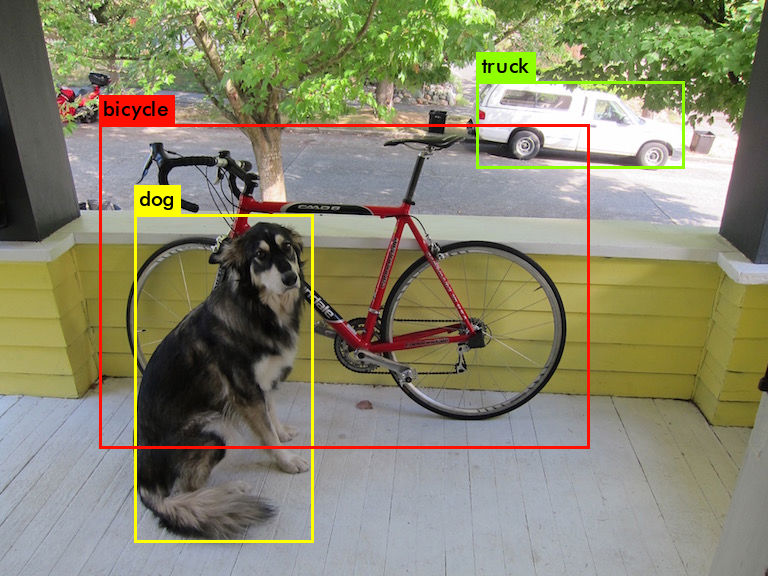

In [136]:
%cd /content/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

from IPython.display import Image
Image('predictions.jpg')

--2021-08-07 12:35:56--  http://beltlineorg-wpengine.netdna-ssl.com/wp-content/uploads/2012/12/IMG_5669-flickr-websized.jpg
Resolving beltlineorg-wpengine.netdna-ssl.com (beltlineorg-wpengine.netdna-ssl.com)... 94.31.29.99
Connecting to beltlineorg-wpengine.netdna-ssl.com (beltlineorg-wpengine.netdna-ssl.com)|94.31.29.99|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89406 (87K) [image/jpeg]
Saving to: ‘street_view.jpg’

street_view.jpg     100%[===================>]  87.31K  --.-KB/s    in 0.1s    

2021-08-07 12:35:57 (910 KB/s) - ‘street_view.jpg’ saved [89406/89406]



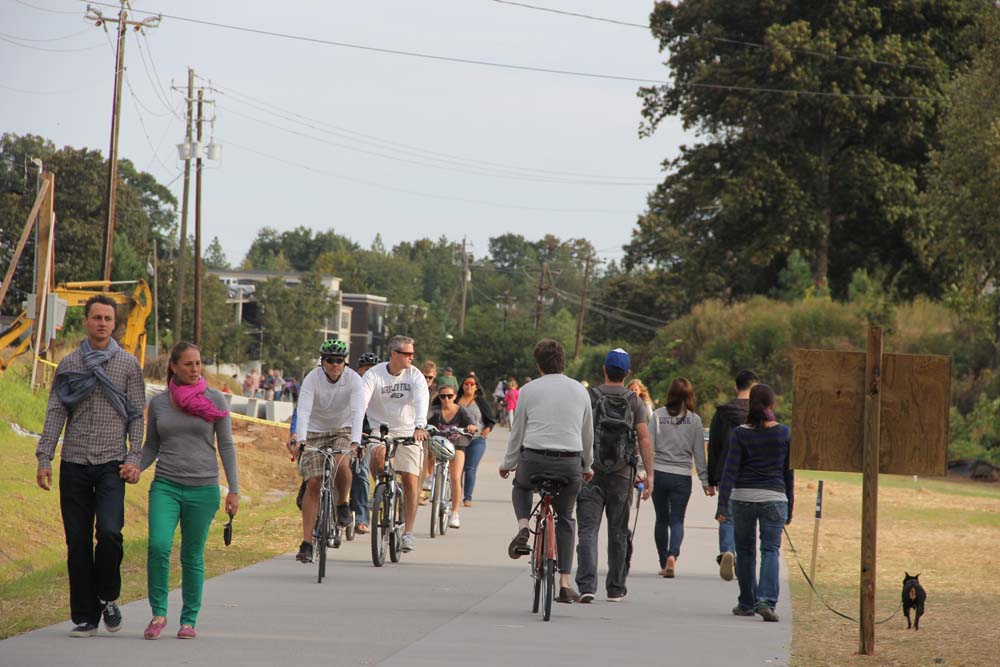

In [137]:
!wget -O street_view.jpg http://beltlineorg-wpengine.netdna-ssl.com/wp-content/uploads/2012/12/IMG_5669-flickr-websized.jpg

from IPython.display import Image, display
display(Image(filename='street_view.jpg'))

/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8      

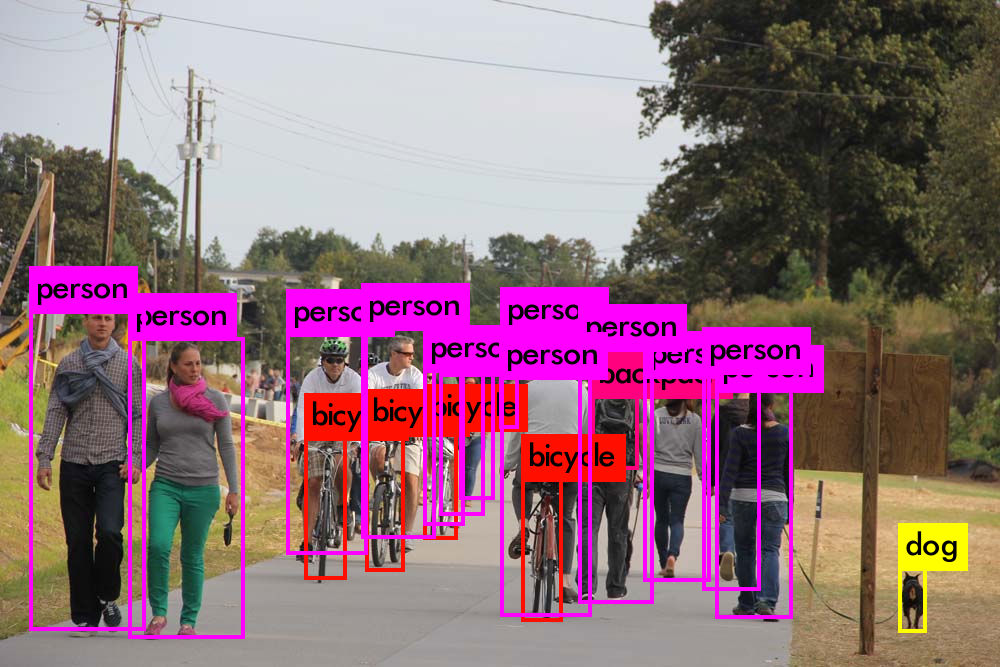

In [138]:
%cd /content/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights street_view.jpg

from IPython.display import Image
Image('predictions.jpg')